In [1]:
import os
import glob
import pickle

path = './klines/'


# Obtener una lista de las carpetas dentro de la carpeta principal
timeframes = [timeframe for timeframe in os.listdir(path) if os.path.isdir(os.path.join(path, timeframe))]

timeframes

['2d01']

BTCUSDT 1152 0 1151
ETHUSDT 1152 0 1151
XRPUSDT 1152 0 1151


<Axes: title={'center': 'Completo [ 2021-01-01 - 2023-07-31 ] Periodo: 2d01'}, xlabel='datetime'>

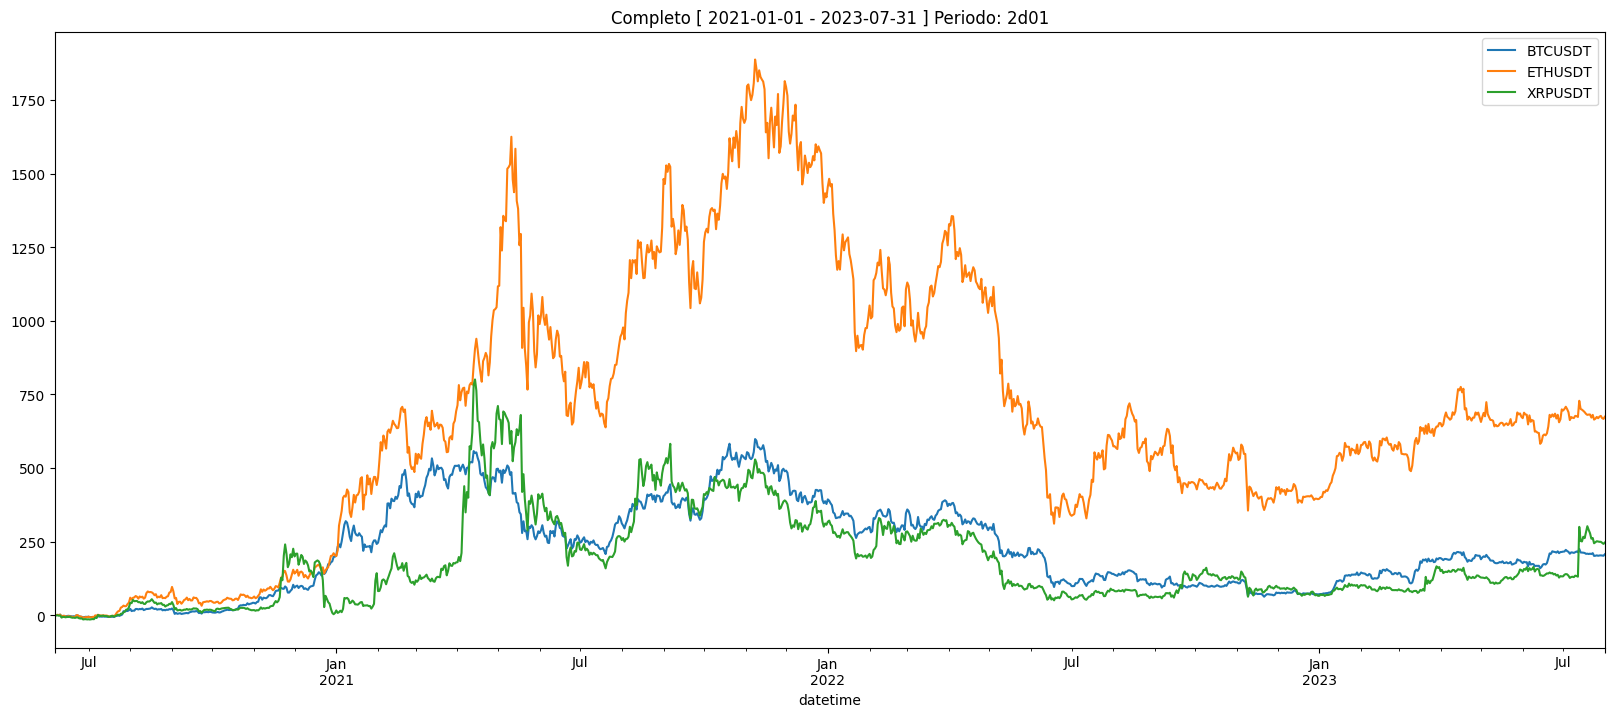

In [3]:
"""
Definir un timeframe y una tendencia para generar los graficos
"""
#timeframe = '1h01'
timeframe = '2d01'
#tendencia = 'Alcista'
#tendencia = 'Lateral'
#tendencia = 'Bajista'
tendencia = 'Completo'



files = glob.glob(path+timeframe+'/'+tendencia+'_*.DataFrame')
keys = {}
data = {}
primer_lectura = False
for f in files:
    file = f
    f = f.replace(os.sep, '')
    f = f.replace('.DataFrame', '')
    f = f.replace(path+timeframe, '')
    parts = f.split('_')
    tendencia = parts[0]
    symbol = parts[1]
    tf = parts[2]
    start = parts[3]
    end = parts[4]
    plot_title = f'{tendencia} [ {start} - {end} ] Periodo: {tf}'
    with open(file, 'rb') as archivo:
        df_tmp = pickle.load(archivo)
        print(symbol,df_tmp['close'].count(),df_tmp.index[0],df_tmp.index[-1])
        df_tmp = df_tmp.drop('high', axis=1)
        df_tmp = df_tmp.drop('low', axis=1)
        df_tmp = df_tmp.drop('open', axis=1)
        df_tmp = df_tmp.drop('volume', axis=1)
        df_tmp = df_tmp.rename(columns={'close':symbol})
        df_tmp = df_tmp.set_index('datetime')

        first_price = df_tmp.iloc[0][symbol]
        df_tmp[symbol] = ((df_tmp[symbol]/first_price)-1)*100

        if not primer_lectura:
            primer_lectura = True
            df = df_tmp.copy()
        else:
            df[symbol] = df_tmp[symbol]

df.plot(figsize=(20,8),title=plot_title)

